In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt  # For visualizations
import sympy as sym

In [ ]:
# Load data from CSV file
data = pd.read_csv("/content/netflix_titles.csv")
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [ ]:
data.isnull().sum()
data.dropna(subset=['country'], inplace=True)
data.isnull().sum()

show_id            0
type               0
title              0
director        2087
cast             622
country            0
date_added         9
release_year       0
rating             6
duration           0
listed_in          0
description        0
dtype: int64

In [ ]:
# Group data by country and content type
content_by_country = (data.groupby(["country", "type"]).size() .to_frame(name="count") .reset_index())
content_by_country

,country,type,count
0,Argentina,Movie,34
1,Argentina,TV Show,16
2,"Argentina, Brazil, France, Poland, Germany, De...",Movie,1
3,"Argentina, Chile",Movie,1
4,"Argentina, Chile, Peru",Movie,1
...,...,...,...
768,Venezuela,Movie,1
769,"Venezuela, Colombia",Movie,1
770,Vietnam,Movie,5
771,West Germany,Movie,1


In [ ]:
# Picking rows of data based on type
movie_data = content_by_country[content_by_country['type'] == 'Movie']
tv_data = content_by_country[content_by_country['type'] == 'TV Show']
movie_data

,country,type,count
0,Argentina,Movie,34
2,"Argentina, Brazil, France, Poland, Germany, De...",Movie,1
3,"Argentina, Chile",Movie,1
4,"Argentina, Chile, Peru",Movie,1
5,"Argentina, France",Movie,1
...,...,...,...
768,Venezuela,Movie,1
769,"Venezuela, Colombia",Movie,1
770,Vietnam,Movie,5
771,West Germany,Movie,1


In [ ]:
tv_data

,country,type,count
1,Argentina,TV Show,16
9,"Argentina, Spain",TV Show,1
11,"Argentina, United States, Mexico",TV Show,1
15,Australia,TV Show,46
18,"Australia, Canada",TV Show,1
...,...,...,...
732,"United States, South Korea, China",TV Show,2
738,"United States, Sweden",TV Show,1
744,"United States, United Kingdom",TV Show,7
746,"United States, United Kingdom, Australia",TV Show,1


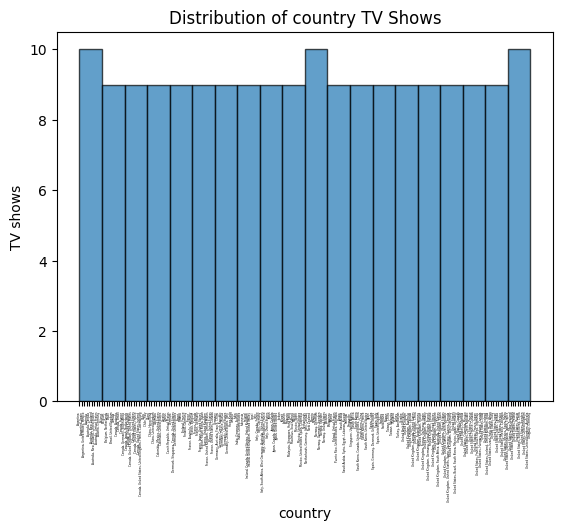

In [ ]:
feature_to_visualize = "country"

plt.hist(tv_data[feature_to_visualize], bins=20, edgecolor='black', alpha=0.7, label='Movies')
plt.xlabel("country")
plt.ylabel("TV shows")
plt.title("Distribution of " + feature_to_visualize + " TV Shows")
plt.xticks(rotation = 90)
plt.xticks(fontsize=2)
plt.show()

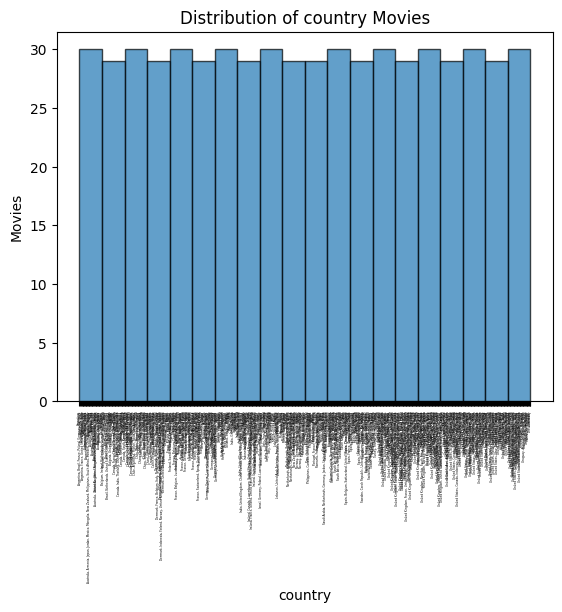

In [ ]:
feature_to_visualize = "country"

plt.hist(movie_data[feature_to_visualize], bins=20, edgecolor='black', alpha=0.7, label='Movies')
plt.xlabel("country")
plt.ylabel("Movies")
plt.title("Distribution of " + feature_to_visualize + " Movies")
plt.xticks(rotation = 90)
plt.xticks(fontsize=2)
plt.show()

In [81]:
#Finding catigories of each variable in need of dummy variables
#Categories of Columns:
column_list = ['type', 'country', 'rating', 'listed_in','director']

for i in column_list:
  if i in data.columns:
    categories = data[i].unique()
    list(categories)
    if i == 'type':
      type_cat = categories
    elif i == 'country':
      country_cat = categories
    elif i == 'rating':
      rating_cat = categories
    elif i == 'listed_in':
      listed_in_cat = categories
    elif i== 'director':
      director_cat = categories

In [82]:
type_cat

array([1, 2])

In [83]:
country_cat

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [84]:
rating_cat

array(['TV-MA', 'R', 'PG-13', 'TV-14', 'TV-PG', 'NR', 'TV-G', 'TV-Y',
       'TV-Y7', 'PG', 'G', 'NC-17', 'TV-Y7-FV', nan, 'UR'], dtype=object)

In [85]:
listed_in_cat

array(['International TV Shows, TV Dramas, TV Sci-Fi & Fantasy',
       'Dramas, International Movies',
       'Horror Movies, International Movies',
       'Action & Adventure, Independent Movies, Sci-Fi & Fantasy',
       'Dramas', 'International TV Shows, TV Dramas, TV Mysteries',
       'Horror Movies, International Movies, Thrillers',
       'Dramas, Thrillers',
       'Crime TV Shows, International TV Shows, TV Dramas',
       'Crime TV Shows, Docuseries, International TV Shows',
       'Documentaries, International Movies, Sports Movies',
       'Independent Movies, Sci-Fi & Fantasy, Thrillers',
       'Dramas, International Movies, Thrillers',
       'Comedies, Dramas, Independent Movies', 'Sports Movies',
       'Dramas, Independent Movies, International Movies',
       'Action & Adventure, Dramas, International Movies',
       'Anime Series, International TV Shows', 'Documentaries',
       'Reality TV', 'Documentaries, International Movies', 'TV Comedies',
       'Dramas, Int

In [86]:
director_cat

array([nan, 'Jorge Michel Grau', 'Gilbert Chan', ..., 'Josef Fares',
       'Mozez Singh', 'Sam Dunn'], dtype=object)

In [ ]:
#Dummy variables for 'type', 'country', 'rating', 'listed_in', 'director'
dummy = {'TV Show': 1, 'Movie': 2}
data['type'] = data['type'].replace(to_replace = dummy)

####repeat with other variables
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,1,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,2,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,2,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,2,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,2,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [ ]:
country_list = ['Brazil', 'Mexico', 'Singapore', 'United States', 'Turkey',
       'Egypt', 'India', 'Poland, United States', 'Thailand', 'Nigeria',
       'Norway, Iceland, United States', 'United Kingdom', 'Japan',
       'South Korea', 'Italy', 'Canada', 'Indonesia', 'Romania', 'Spain',
       'Iceland', 'South Africa, Nigeria', 'France',
       'United States, South Africa', 'Portugal, Spain',
       'Hong Kong, China, Singapore', 'United States, Germany',
       'South Africa, China, United States', 'Argentina',
       'United States, France, Serbia', 'Germany',
       'Denmark, France, Poland', 'Poland', 'Kenya',
       'New Zealand, United Kingdom', 'Pakistan', 'Australia',
       'Australia, United States', 'Mexico, United States',
       'United States, China', 'China, Hong Kong', 'Taiwan',
       'United States, United Kingdom', 'France, South Korea, Japan',
       'United States, Canada', 'United Kingdom, United States',
       'Netherlands, Denmark, South Africa', 'Canada, United States',
       'Denmark', 'Hong Kong', 'France, Netherlands, Singapore', 'China',
       'Philippines', 'United Kingdom, Spain, United States',
       'United Arab Emirates, United States', 'Netherlands',
       'United Kingdom, Hong Kong', 'Iran, France',
       'United States, United Kingdom, France',
       'United Kingdom, France, Belgium, United States, China',
       'Argentina, Brazil, France, Poland, Germany, Denmark',
       'Israel, United States', 'United States, Mexico',
       'Uruguay, Argentina, Spain', 'Singapore, France',
       'United Kingdom, United States, France, Germany',
       'Turkey, United States', 'Bulgaria, United States',
       'Australia, France', 'Hong Kong, Iceland, United States',
       'United Arab Emirates', 'United States, Chile',
       'Germany, France, Russia', 'Mauritius, South Africa',
       'United States, Japan', 'Lebanon', 'United States, Bulgaria',
       'Colombia', 'Uruguay, Argentina', 'Egypt, Algeria',
       'France, Egypt', 'Uruguay', 'Soviet Union, India',
       'Sweden, United States', 'South Africa', 'Malaysia',
       'Ireland, United Kingdom, United States', 'Spain, Italy',
       'United Kingdom, France, Germany',
       'United States, Germany, Canada', 'United States, India',
       'Japan, United States', 'Denmark, United States',
       'South Africa, United States', 'Canada, Luxembourg',
       'Serbia, United States', 'Canada, Nigeria',
       'Iceland, Sweden, Belgium', 'Ireland, Canada',
       'United States, Italy', 'Finland', 'India, Germany',
       'China, Spain, South Korea, United States', 'Spain, Belgium',
       'United Kingdom, Canada, United States, Germany',
       'Brazil, Netherlands, United States, Colombia, Austria, Germany',
       'France, Canada, Belgium',
       'India, United Kingdom, China, Canada, Japan, South Korea, United States',
       'France, Belgium', 'Indonesia, South Korea, Singapore', 'Norway',
       'Peru', 'France, Senegal, Belgium', 'Canada, France', 'Chile',
       'Romania, France, Switzerland, Germany',
       'Bulgaria, United States, Spain, Canada', 'Sweden, Netherlands',
       'Ghana', 'France, United States, Mexico',
       'Australia, United Kingdom, United Arab Emirates, Canada',
       'Singapore, United States', 'Japan, Canada, United States',
       'Saudi Arabia',
       'Australia, Armenia, Japan, Jordan, Mexico, Mongolia, New Zealand, Philippines, South Africa, Sweden, United States, Uruguay',
       'United States, France', 'Norway, Denmark, Netherlands, Sweden',
       'Namibia', 'Mexico, Finland', 'United States, Australia', 'Russia',
       'Australia, Canada', 'United Kingdom, Ireland', 'Belgium, France',
       'New Zealand', 'Uruguay, Spain, Mexico', 'South Korea, China',
       'United States, Canada, Indonesia, United Kingdom, China, Singapore',
       'India, Iran', 'United States, France, Japan',
       'United Kingdom, France', 'Turkey, India', 'Philippines, Qatar',
       'Vietnam', 'Ireland, Luxembourg, Belgium',
       'Saudi Arabia, Syria, Egypt, Lebanon, Kuwait',
       'Russia, United States', 'United Kingdom, Russia, United States',
       'Argentina, Spain', 'Germany, Jordan, Netherlands',
       'Hong Kong, China', 'Argentina, United States',
       'France, Belgium, Spain', 'Germany, United States',
       'Denmark, Sweden, Israel, United States',
       'Ireland, United Kingdom', 'United States, Iceland',
       'United Arab Emirates, United Kingdom, India', 'Sweden',
       'Norway, Germany, Sweden', 'Finland, France', 'Denmark, Spain',
       'United Kingdom, Russia',
       'United States, United Kingdom, Australia',
       'India, United Kingdom', 'United States, Canada, Ireland',
       'Canada, United Kingdom',
       'United States, Israel, Italy, South Africa',
       'India, United States', 'United Kingdom, China',
       'Indonesia, Singapore', 'Netherlands, Denmark, France, Germany',
       'South Korea, Japan',
       'Philippines, Canada, United Kingdom, United States',
       'France, Malta, United States', 'Kuwait',
       'United Kingdom, Pakistan', 'Ireland', 'France, New Zealand',
       'United Kingdom, United States, Australia',
       'United Kingdom, Czech Republic, United States, Germany, Bahamas',
       'United States, Australia, China',
       'China, Germany, India, United States', 'Germany, Sri Lanka',
       'United States, Sweden', 'Canada, United States, Cayman Islands',
       'India, France', 'United Kingdom, Canada',
       'United States, India, Bangladesh',
       'United States, Canada, France',
       'Taiwan, China, France, United States', 'Brazil, France, Germany',
       'United States,', 'Turkey, France, Germany, Poland',
       'Australia, New Zealand, United States',
       'Germany, United States, Hong Kong, Singapore',
       'France, Germany, Switzerland', 'Mexico, Argentina',
       'Italy, United States, Argentina',
       'Germany, France, Luxembourg, United Kingdom, United States',
       'Canada, United States, United Kingdom',
       'United Kingdom, Canada, Italy', 'Czech Republic, France',
       'Zimbabwe', 'United Kingdom, France, Germany, Spain',
       'Taiwan, Hong Kong, United States, China', 'China, United States',
       'Canada, Brazil', 'United Kingdom, Australia', 'Hungary',
       'Germany, Australia', 'United Kingdom, Poland, United States',
       'Bulgaria', 'Philippines, United States', 'Finland, Germany',
       'United States, Thailand',
       'Spain, Belgium, Switzerland, United States, China, United Kingdom',
       'Denmark, Zimbabwe', 'United Kingdom, South Africa',
       'Finland, Sweden, Norway, Latvia, Germany',
       'United Kingdom, India',
       'South Africa, United States, New Zealand, Canada',
       'France, Qatar', 'France, Algeria',
       'United States, Italy, United Kingdom, Liechtenstein',
       'Denmark, France, Belgium, Italy, Netherlands, United States, United Kingdom',
       'United States, Australia, Mexico',
       'United Kingdom, Czech Republic, Germany, United States',
       'Russia, Poland, Serbia', 'France, China, Japan, United States',
       'United States, South Korea, China', 'Germany, Belgium',
       'Chile, Argentina', 'China, United States, United Kingdom',
       'Pakistan, Norway, United States',
       'United Kingdom, Japan, United States', 'Philippines, Singapore',
       'United States, Canada, Belgium, United Kingdom', 'Venezuela',
       'Argentina, Uruguay, Serbia', 'United States, Mexico, Colombia',
       'Colombia, Peru, United Kingdom', 'Brazil, United States',
       'Czech Republic, United States',
       'Canada, France, Italy, Morocco, United States',
       'Canada, Spain, France', 'Hong Kong, United States',
       'France, Canada, China, Cambodia', 'United States, Indonesia',
       'Spain, France', 'Spain, Mexico, France', 'Spain, France, Italy',
       'Spain, France, United States', 'United States, France, Canada',
       'Israel', 'Italy, France', 'United Kingdom, Canada, United States',
       'Cambodia, United States', 'China, Japan',
       'United Arab Emirates, United States, United Kingdom',
       'Argentina, Italy', 'United Kingdom, Israel, Russia',
       'Italy, Switzerland, Albania, Poland', 'Spain, Cuba',
       'United States, Brazil', 'United States, France, Mexico',
       'United States, Nicaragua', 'Austria, Germany',
       'United Arab Emirates, Jordan, Lebanon',
       'France, United Kingdom, United States',
       'United Kingdom, United States, Spain, Germany, Greece, Canada',
       'France, Belgium, Luxembourg, Cambodia,', 'Italy, Turkey',
       'Brazil, France', 'India, Turkey', 'Kenya, United States',
       'United States, South Korea', 'South Korea, United States',
       'Italy, Canada, France', 'Thailand, United States',
       'United Kingdom, Denmark, Canada, Croatia', 'Netherlands, Belgium',
       'United Kingdom, Canada, United States, Cayman Islands',
       'Italy, Germany', 'United States, France, United Kingdom, Japan',
       'United States, United Kingdom, Denmark, Sweden',
       'United States, United Kingdom, Italy',
       'United States, France, Canada, Spain', 'Uruguay, Guatemala',
       'Germany, Australia, France, China',
       'United States, United Kingdom, Japan',
       'United States, United Kingdom, Canada',
       'Italy, Switzerland, France, Germany',
       'Russia, United States, China', 'United States, Canada, Germany',
       'United States, Czech Republic', 'Ireland, United States',
       'United States, United Arab Emirates',
       'France, Australia, Germany', 'Hong Kong, China, United States',
       'Lebanon, United Arab Emirates, France, Switzerland, Germany',
       'United States, South Korea, Japan', 'Romania, United States',
       'West Germany', 'United States, Ireland', 'Chile, Italy',
       'Ireland, United Kingdom, Italy, United States', 'Belgium',
       'Poland,', 'Slovenia, Croatia, Germany, Czech Republic, Qatar',
       'Canada, United Kingdom, Netherlands',
       'United Kingdom, United States, France',
       'Indonesia, United Kingdom', 'United States, Spain, Germany',
       'India, Japan', 'Switzerland, France, Belgium, United States',
       'China, South Korea, United States',
       'United Kingdom, France, Belgium',
       'Canada, Ireland, United States',
       'United Kingdom, United States, Dominican Republic',
       'United States, Senegal', 'Germany, United Kingdom, United States',
       'United States, Canada, United Kingdom',
       'Canada, United States, France', 'United Kingdom, Germany, Canada',
       'Argentina, France', 'South Africa, Germany, Netherlands, France',
       'Canada, United States, United Kingdom, France, Luxembourg',
       'Finland, Germany, Belgium',
       'United States, United Kingdom, Germany', 'Taiwan, China',
       'Cambodia', 'Spain, Portugal', 'Ireland, United States, France',
       'Jordan', 'Austria', 'Germany, United States, Canada',
       'United Kingdom, Germany, Canada, United States',
       'United States, France, Canada, Lebanon, Qatar',
       'Indonesia, Netherlands',
       'Netherlands, Belgium, United Kingdom, United States',
       'China, United States, Australia',
       'France, Belgium, China, United States', 'Spain, United Kingdom',
       'United States, Chile, Israel', 'Bangladesh',
       'United Kingdom, Norway, Denmark, Germany, Sweden',
       'United States, Japan, Canada', 'Norway, Denmark, Sweden',
       'China, India, Nepal', 'United States, Argentina',
       'Mexico, United States, Spain, Colombia',
       'Colombia, Mexico, United States',
       'United Kingdom, Belgium, Sweden', 'Nigeria, United Kingdom',
       'United Kingdom, South Korea', 'United States, Taiwan',
       'Netherlands, Belgium, Germany, Jordan', 'France, Canada',
       'United Kingdom, France, United States',
       'Denmark, Singapore, Canada, United States', 'Denmark, China',
       'Malaysia, Singapore, Hong Kong', 'Norway, United States',
       'United States, Philippines', 'United States, Greece, Brazil',
       'France, United States', 'South Korea, France',
       'United States, Australia, Samoa, United Kingdom',
       'Canada, South Africa', 'United Kingdom, Italy',
       'Germany, United Kingdom', 'China, United Kingdom',
       'Argentina, Chile, Peru', 'United States, Russia',
       'Uruguay, Germany', 'Turkey, Azerbaijan',
       'United States, China, Hong Kong',
       'Canada, Germany, France, United States',
       'Argentina, United States, Mexico',
       'France, United Kingdom, India', 'China, Taiwan',
       'Italy, United Kingdom, France', 'Poland, West Germany',
       'Germany, United States, Sweden', 'Canada, Spain',
       'United Kingdom, France, Belgium, United States', 'France, Japan',
       'Netherlands, Germany, Italy, Canada', 'United States, Cambodia',
       'United States, Greece', 'United States, China, Colombia',
       'United States, Spain, Italy',
       'Norway, United Kingdom, France, Ireland',
       'United States, Bermuda, Ecuador', 'United Kingdom, Poland',
       'China, Canada, United States', 'United States, Spain',
       'India, Mexico', 'United Kingdom, West Germany',
       'Pakistan, United States', 'Israel, Sweden, Germany, Netherlands',
       'Chile, United States, France', 'France, Morocco',
       'United Kingdom, Germany', 'Georgia, Germany, France',
       'Switzerland, France', 'Turkey, South Korea', 'Italy, India',
       'United States, Botswana', 'United States, Colombia, Mexico',
       'Chile, Argentina, France, Spain, United States',
       'Puerto Rico, United States, Colombia', 'United States, Nigeria',
       'Germany, United States, France',
       'Spain, Germany, Denmark, United States',
       'United Kingdom, United States, Japan',
       'Netherlands, United States',
       'United States, India, South Korea, China',
       'Denmark, Germany, Belgium, United Kingdom, France',
       'Denmark, Germany, Belgium, United Kingdom, France, Sweden',
       'France, Switzerland, Spain, United States, United Arab Emirates',
       'Norway, Sweden', 'United States, Ireland, United Kingdom, India',
       'United Kingdom, Singapore', 'Spain, Germany',
       'Germany, Czech Republic',
       'Denmark, Brazil, France, Portugal, Sweden',
       'Brazil, India, China, United States', 'India, Germany, Austria',
       'Italy, United States', 'Denmark, France, United States, Sweden',
       'Australia, Iraq', 'China, Morocco, Hong Kong', 'Spain, Colombia',
       'Australia, United Arab Emirates',
       'Canada, United States, Germany', 'France, Belgium, Italy',
       'United Kingdom, Thailand', 'Venezuela, Colombia',
       'France, Luxembourg, Canada', 'India, Nepal', 'Mexico, Spain',
       'Colombia, United States', 'Colombia, Mexico',
       'France, Germany, Czech Republic, Belgium',
       'Germany, China, United Kingdom', 'Canada, Hungary, United States',
       'Pakistan, United Arab Emirates', 'France, United Kingdom',
       'Spain, United Kingdom, United States', 'United Kingdom, Kenya',
       'United States, Norway, Canada', 'Canada, United States, Ireland',
       'Switzerland, Vatican City, Italy, Germany, France',
       'Portugal, France, Poland, United States',
       'France, Japan, United States', 'United States, New Zealand',
       'United States, New Zealand, Japan',
       'United States, Netherlands, Japan, France', 'India, Switzerland',
       'Canada, India', 'Canada, Japan, United States',
       'United States, Morocco', 'United States, Mexico, Spain, Malta',
       'Norway, Denmark', 'South Korea, Canada, United States, China',
       'Singapore, Japan, France',
       'Canada, Mexico, Germany, South Africa',
       'United Kingdom, United States, Canada',
       'Germany, France, United States, Canada, United Kingdom',
       'Peru, Germany, Norway', 'Singapore, Malaysia',
       'United States, Uruguay', 'India, Canada',
       'Ireland, Canada, United Kingdom, United States',
       'United States, Germany, Australia', 'Senegal',
       'Israel, Germany, France', 'Australia, France, Ireland',
       'South Africa, Angola', 'Austria, Czech Republic',
       'Australia, India', 'United States, United Kingdom, Canada, Japan',
       'Sweden, United Kingdom, Finland', 'Hong Kong, Taiwan',
       'United States, United Kingdom, Spain, South Korea',
       'South Korea, China, United States', 'Guatemala', 'Ukraine',
       'United States, United Kingdom, Canada, China',
       'Italy, South Africa, West Germany, Australia, United States',
       'United Kingdom, Finland, Germany',
       'South Africa, United States, Germany',
       'United States, Germany, United Kingdom, Australia',
       'India, Soviet Union', 'Italy, France, Switzerland',
       'Canada, France, United States', 'United States, Colombia',
       'India, Malaysia', 'Switzerland, United States',
       'Thailand, Canada, United States',
       'China, Hong Kong, United States', 'United Kingdom, New Zealand',
       'United Kingdom, France, Germany, United States',
       'South Korea, Czech Republic',
       'Czech Republic, United Kingdom, France',
       'Australia, United Kingdom, Canada',
       'Canada, United Kingdom, United States', 'United States, Hungary',
       'Jamaica, United States', 'Switzerland',
       'Australia, United Kingdom, United States, New Zealand, Italy, France',
       'France, United States, Canada', 'Australia, United Kingdom',
       'United States, Denmark',
       'United Kingdom, France, Canada, Belgium, United States',
       'Denmark, United Kingdom, Sweden', 'Belarus', 'Cyprus',
       'Lebanon, United States, United Arab Emirates',
       'United States, Hong Kong', 'United States, Kazakhstan',
       'Argentina, France, United States, Germany, Qatar',
       'United States, Germany, United Kingdom',
       'United States, Germany, United Kingdom, Italy',
       'United States, New Zealand, United Kingdom',
       'Finland, United States', 'Spain, France, Uruguay',
       'France, Belgium, United States', 'France, Canada, United States',
       'Spain, Argentina', 'United Kingdom, India, United States',
       'Chile, France',
       'United States, United Kingdom, France, Germany, Japan',
       'Canada, Norway', 'United States, Hungary, Ireland, Canada',
       'United States, Canada, China', 'United Kingdom, Malawi',
       'Ireland, Canada, Luxembourg, United States, United Kingdom, Philippines, India',
       'United States, Czech Republic, United Kingdom',
       'Ghana, United States', 'Israel, Germany', 'Spain, Mexico',
       'Mexico, France', 'Brazil, United Kingdom',
       'France, Belgium, Luxembourg, Romania, Canada, United States',
       'Israel, Germany, Poland, Luxembourg, Belgium, France, United States',
       'France, Germany', 'United States, Malta, France, United Kingdom',
       'United Kingdom, United States, Germany, Denmark, Belgium, Japan',
       'Austria, United States', 'Canada, Australia',
       'Greece, United States',
       'United Kingdom, France, Belgium, Canada, United States',
       'Argentina, Chile', 'Czech Republic, Slovakia',
       'United Kingdom, Germany, United States, France',
       'United Kingdom, Lithuania', 'Egypt, France',
       'Spain, France, Canada', 'United States, Greece, United Kingdom',
       'United Kingdom, China, United States, India', 'Taiwan, Malaysia',
       'United States, Sweden, Norway',
       'United Kingdom, United States, Morocco',
       'United States, United Kingdom, Morocco',
       'United States, China, Canada', 'Spain, Canada, United States',
       'Canada, Belgium', 'United States, India, United Arab Emirates',
       'United Kingdom, Canada, France, United States',
       'Spain, Thailand, United States', 'Canada, Germany, South Africa',
       'India, Germany, France',
       'United States, Israel, United Kingdom, Canada',
       'United Kingdom, Hungary, Australia', 'Lebanon, France',
       'Belgium, Ireland, Netherlands, Germany, Afghanistan',
       'Chile, Peru', 'Paraguay, Argentina',
       'United Kingdom, Italy, Israel, Peru, United States',
       'Norway, Germany', 'France, Canada, Italy, United States, China',
       'Netherlands, Germany, Denmark, United Kingdom', 'France, Lebanon',
       'Ireland, United Kingdom, Greece, France, Netherlands',
       'Denmark, Indonesia, Finland, Norway, United Kingdom, Israel, France, United States, Germany, Netherlands',
       'New Zealand, United States', 'Argentina, Uruguay, Spain, France',
       'United Kingdom, Germany, United States',
       'United States, Australia, South Africa, United Kingdom',
       'Italy, Belgium', 'United States, Germany, Mexico',
       'Chile, Spain, Argentina, Germany', 'Germany, Italy',
       'United Kingdom, Nigeria',
       'Belgium, United Kingdom, United States', 'Australia, New Zealand',
       'Spain, Switzerland', 'Indonesia, United States',
       'Canada, South Korea, United States',
       'France, Iran, United States', 'Croatia',
       'Somalia, Kenya, Sudan, South Africa, United States',
       'Ireland, France, Iceland, United States, Mexico, Belgium, United Kingdom, Hong Kong',
       'Spain, United States', 'United States, Canada, Japan, Panama',
       'United Kingdom, Spain, Belgium', 'Serbia, South Korea, Slovenia',
       'Denmark, United Kingdom, South Africa, Sweden, Belgium',
       'Germany, Canada, United States', 'Ireland, South Africa',
       'Canada, Germany', 'Spain, France, Canada, United States',
       'India, United Kingdom, Canada, United States',
       'United States, Belgium, Canada',
       'United States, France, Canada, Belgium',
       'United Kingdom, Egypt, United States',
       'United Kingdom, Germany, United Arab Emirates, New Zealand',
       'United Kingdom, France, United States, Belgium, Luxembourg, China, Germany',
       'United Kingdom, Spain, United States, Germany',
       'United States, France, Italy, United Kingdom', 'Georgia',
       'United States, United Kingdom, India',
       'Ireland, Canada, United States, United Kingdom',
       'New Zealand, United Kingdom, Australia', 'United States, Poland',
       'United Arab Emirates, Romania',
       'United Kingdom, Australia, Canada, United States',
       'Mexico, Netherlands', 'Spain, Italy, Argentina',
       'Germany, United States, Italy', 'United States, Venezuela',
       'United Kingdom, Canada, Japan', 'Canada, Japan, Netherlands',
       'United Kingdom, United States, Czech Republic',
       'United Kingdom, China, United States',
       'United Kingdom, Brazil, Germany',
       'Thailand, China, United States',
       'United Kingdom, Namibia, South Africa, Zimbabwe, United States',
       'United Kingdom, South Africa, Australia, United States',
       'Canada, United States, India, United Kingdom',
       'United States, Brazil, South Korea, Mexico, Japan, Germany',
       'France, Lebanon, United Kingdom',
       'United Kingdom, Jordan, Qatar, Iran',
       'Switzerland, United Kingdom, United States',
       'Belgium, Netherlands',
       'United Kingdom, Germany, France, United States',
       'Romania, United Kingdom', 'Lebanon, Qatar',
       'United Kingdom, India, Sweden', 'United Kingdom, Belgium',
       'India, Pakistan', 'United Kingdom,',
       'Saudi Arabia, Netherlands, Germany, Jordan, United Arab Emirates, United States',
       'France, Brazil, Spain, Belgium',
       'United States, Brazil, India, Uganda, China',
       'United Kingdom, Ireland, United States',
       'Lebanon, Canada, France', 'India, Australia',
       'Austria, Iraq, United States', 'France, Norway, Lebanon, Belgium',
       'United Kingdom, France, United States, Belgium',
       'Saudi Arabia, United Arab Emirates',
       'Peru, United States, United Kingdom',
       'Germany, United States, United Kingdom, Canada',
       'Uruguay, Argentina, Germany, Spain',
       'France, Luxembourg, United States', 'United Kingdom, Spain',
       'Canada, India, Thailand, United States, United Arab Emirates',
       'Romania, Bulgaria, Hungary',
       'United States, East Germany, West Germany',
       'France, Netherlands, South Africa, Finland',
       'United Kingdom, Ukraine, United States',
       'Egypt, Austria, United States', 'Russia, Spain',
       'Croatia, Slovenia, Serbia, Montenegro', 'Japan, Canada',
       'United States, France, South Korea, Indonesia',
       'United Arab Emirates, Jordan',
       'Sweden, Czech Republic, United Kingdom, Denmark, Netherlands']

In [ ]:
#Dummy variables for 'type', 'country', 'rating', 'listed_in', 'director'
country_dummy = {}
count = 1
for i in country_list:
  country_dummy[i] = count
  count += 1

data['country'] = data['country'].replace(to_replace = country_dummy)
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,1,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",1,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,2,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",2,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,2,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",3,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,2,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",4,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,2,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",4,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [ ]:
#Dummy variables for 'type', 'country', 'rating', 'listed_in', 'director'
dummy = {'TV-MA': 1, 'R': 2, 'PG-13': 3, 'TV-14': 4, 'TV-PG': 5, 'NR': 6, 'TV-G': 7, 'TV-Y': 8, 'TV-Y7': 9, 'PG': 10, 'G': 11,
         'NC-17': 12, 'TV-Y7-FV': 13,'UR': 14}
data['rating'] = data['rating'].replace(to_replace = dummy)

####repeat with other variables
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,1,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",1,"August 14, 2020",2020,1.0,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,2,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",2,"December 23, 2016",2016,1.0,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,2,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",3,"December 20, 2018",2011,2.0,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,2,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",4,"November 16, 2017",2009,3.0,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,2,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",4,"January 1, 2020",2008,3.0,123 min,Dramas,A brilliant group of students become card-coun...


In [ ]:
listed_in_list = ['International TV Shows, TV Dramas, TV Sci-Fi & Fantasy',
       'Dramas, International Movies',
       'Horror Movies, International Movies',
       'Action & Adventure, Independent Movies, Sci-Fi & Fantasy',
       'Dramas', 'International TV Shows, TV Dramas, TV Mysteries',
       'Horror Movies, International Movies, Thrillers',
       'Dramas, Thrillers',
       'Crime TV Shows, International TV Shows, TV Dramas',
       'Crime TV Shows, Docuseries, International TV Shows',
       'Documentaries, International Movies, Sports Movies',
       'Independent Movies, Sci-Fi & Fantasy, Thrillers',
       'Dramas, International Movies, Thrillers',
       'Comedies, Dramas, Independent Movies', 'Sports Movies',
       'Dramas, Independent Movies, International Movies',
       'Action & Adventure, Dramas, International Movies',
       'Anime Series, International TV Shows', 'Documentaries',
       'Reality TV', 'Documentaries, International Movies', 'TV Comedies',
       'Dramas, International Movies, Romantic Movies', 'Comedies',
       'Comedies, Romantic Movies', 'Documentaries, Sports Movies',
       'Comedies, Dramas, International Movies',
       'Comedies, International Movies',
       'Action & Adventure, Sci-Fi & Fantasy', 'Dramas, Romantic Movies',
       'Dramas, Romantic Movies, Sports Movies',
       'Comedies, International Movies, Romantic Movies',
       'Action & Adventure',
       'International TV Shows, Romantic TV Shows, TV Dramas',
       'Docuseries, Science & Nature TV',
       'Dramas, International Movies, Sports Movies', 'Movies',
       'British TV Shows, International TV Shows, Reality TV',
       'Dramas, Independent Movies, Sports Movies',
       'International TV Shows, Korean TV Shows, Romantic TV Shows',
       'Horror Movies, Independent Movies, Thrillers',
       'Crime TV Shows, TV Dramas, TV Mysteries',
       'Crime TV Shows, Docuseries', 'Horror Movies, Thrillers',
       'Action & Adventure, International Movies',
       'Horror Movies, Independent Movies',
       'Documentaries, Music & Musicals',
       'International Movies, Music & Musicals', 'Sci-Fi & Fantasy',
       'Dramas, Independent Movies', 'British TV Shows, Reality TV',
       'International TV Shows, TV Dramas',
       'Action & Adventure, Comedies, International Movies',
       'Comedies, Dramas', 'Dramas, LGBTQ Movies',
       'Documentaries, Faith & Spirituality',
       'Action & Adventure, Comedies',
       "Kids' TV, TV Action & Adventure, TV Sci-Fi & Fantasy",
       'International Movies, Thrillers', "Kids' TV",
       'International TV Shows, Romantic TV Shows, Spanish-Language TV Shows',
       'Children & Family Movies, Comedies', 'Comedies, LGBTQ Movies',
       'Comedies, Dramas, Romantic Movies', 'Action & Adventure, Dramas',
       'Dramas, Independent Movies, Romantic Movies',
       'Comedies, Independent Movies, Thrillers', 'TV Shows',
       'Docuseries', 'Comedies, International Movies, Music & Musicals',
       'Docuseries, International TV Shows, Science & Nature TV',
       'British TV Shows, Docuseries, Science & Nature TV',
       'Children & Family Movies, Dramas, Sports Movies',
       'Children & Family Movies', 'Dramas, Sci-Fi & Fantasy',
       'International TV Shows, TV Comedies, TV Dramas',
       'Action & Adventure, Classic Movies, Dramas',
       'Children & Family Movies, Dramas',
       'Action & Adventure, International Movies, Romantic Movies',
       'Children & Family Movies, Dramas, Romantic Movies',
       'Children & Family Movies, Comedies, Music & Musicals',
       'Classic Movies, Cult Movies, Dramas',
       'Action & Adventure, International Movies, Sci-Fi & Fantasy',
       'Comedies, Independent Movies', 'Comedies, Horror Movies',
       'Children & Family Movies, Comedies, Romantic Movies',
       'International TV Shows, TV Dramas, TV Horror', 'Thrillers',
       'Stand-Up Comedy & Talk Shows, TV Comedies',
       'International TV Shows, Romantic TV Shows, Teen TV Shows',
       'International TV Shows, Romantic TV Shows, TV Comedies',
       'Crime TV Shows, International TV Shows, Korean TV Shows',
       'Comedies, International Movies, Sports Movies',
       'Dramas, LGBTQ Movies, Romantic Movies', 'Comedies, Cult Movies',
       'Dramas, Independent Movies, LGBTQ Movies',
       'International TV Shows, Reality TV', 'Stand-Up Comedy',
       'Documentaries, LGBTQ Movies',
       "Kids' TV, TV Action & Adventure, TV Comedies",
       'Anime Features, International Movies',
       'Music & Musicals, Romantic Movies', 'Comedies, Music & Musicals',
       'International TV Shows, TV Comedies',
       'International Movies, Romantic Movies',
       'Anime Features, Children & Family Movies, International Movies',
       'British TV Shows, TV Comedies, TV Dramas', 'TV Dramas',
       'Horror Movies',
       'Action & Adventure, Children & Family Movies, Independent Movies',
       'Dramas, International Movies, Music & Musicals',
       'Comedies, International Movies, Sci-Fi & Fantasy',
       'International TV Shows, Korean TV Shows, Stand-Up Comedy & Talk Shows',
       'Docuseries, Science & Nature TV, TV Comedies',
       'Dramas, Sports Movies',
       'Dramas, Music & Musicals, Romantic Movies',
       'Children & Family Movies, Comedies, International Movies',
       'Action & Adventure, Documentaries, International Movies',
       'Comedies, International Movies, Thrillers',
       'Action & Adventure, Dramas, Romantic Movies',
       'Horror Movies, Independent Movies, International Movies',
       'Dramas, Independent Movies, Sci-Fi & Fantasy',
       'International Movies, Sci-Fi & Fantasy',
       'Docuseries, Reality TV, Science & Nature TV',
       'British TV Shows, Docuseries, International TV Shows',
       'Docuseries, International TV Shows',
       'British TV Shows, International TV Shows, TV Comedies',
       'Action & Adventure, Horror Movies',
       'British TV Shows, Reality TV, Romantic TV Shows',
       'Crime TV Shows, International TV Shows, TV Action & Adventure',
       'International TV Shows, Reality TV, Romantic TV Shows',
       'International Movies, Music & Musicals, Romantic Movies',
       'TV Comedies, TV Dramas',
       'Anime Series, Crime TV Shows, International TV Shows',
       "Kids' TV, TV Comedies, TV Dramas",
       'Action & Adventure, Comedies, Dramas',
       'Documentaries, International Movies, Music & Musicals',
       "Kids' TV, TV Comedies",
       'Classic Movies, Dramas, International Movies',
       'Comedies, Independent Movies, International Movies',
       'Classic Movies, Comedies, Dramas',
       'International TV Shows, TV Action & Adventure, TV Mysteries',
       'Comedies, International Movies, LGBTQ Movies',
       'Children & Family Movies, Comedies, Sci-Fi & Fantasy',
       'TV Dramas, Teen TV Shows',
       'Children & Family Movies, Independent Movies',
       'International TV Shows, Spanish-Language TV Shows, TV Comedies',
       'Crime TV Shows, TV Action & Adventure, TV Dramas',
       'Action & Adventure, Anime Features, International Movies',
       'Action & Adventure, Classic Movies, Comedies',
       'Crime TV Shows, TV Dramas',
       'TV Horror, TV Mysteries, TV Thrillers', 'TV Dramas, TV Thrillers',
       'Comedies, Cult Movies, Dramas',
       'Crime TV Shows, TV Comedies, Teen TV Shows',
       'Dramas, Faith & Spirituality', 'Comedies, Dramas, LGBTQ Movies',
       'Action & Adventure, Comedies, Cult Movies',
       'International TV Shows, TV Action & Adventure, TV Comedies',
       'Dramas, Independent Movies, Music & Musicals',
       'International TV Shows, TV Horror, TV Thrillers',
       'International TV Shows, TV Horror, TV Mysteries',
       'International TV Shows, TV Dramas, Teen TV Shows',
       'Anime Series, International TV Shows, Teen TV Shows',
       'Dramas, Sci-Fi & Fantasy, Thrillers',
       'TV Action & Adventure, TV Dramas, TV Mysteries',
       'Action & Adventure, Comedies, Sci-Fi & Fantasy',
       "Anime Series, Kids' TV",
       'Crime TV Shows, International TV Shows, Spanish-Language TV Shows',
       'Horror Movies, Sci-Fi & Fantasy, Thrillers',
       'International TV Shows, Korean TV Shows, TV Dramas',
       'Stand-Up Comedy & Talk Shows',
       'International Movies, Sci-Fi & Fantasy, Thrillers',
       'Crime TV Shows, TV Action & Adventure',
       'International TV Shows, Korean TV Shows, TV Action & Adventure',
       'TV Action & Adventure, TV Comedies, TV Horror',
       'International TV Shows, Romantic TV Shows',
       "Crime TV Shows, Kids' TV, TV Comedies",
       'TV Comedies, TV Dramas, Teen TV Shows',
       'Docuseries, International TV Shows, Reality TV',
       "Classic & Cult TV, Kids' TV, TV Action & Adventure",
       'Horror Movies, Sci-Fi & Fantasy',
       'Romantic TV Shows, TV Dramas, TV Sci-Fi & Fantasy',
       'Dramas, International Movies, Sci-Fi & Fantasy',
       'Children & Family Movies, Sports Movies',
       'Dramas, Independent Movies, Thrillers',
       'Independent Movies, International Movies, Thrillers',
       'British TV Shows, TV Comedies',
       'International TV Shows, Spanish-Language TV Shows, TV Dramas',
       'Action & Adventure, Comedies, Independent Movies',
       'International TV Shows, TV Action & Adventure, TV Dramas',
       'Children & Family Movies, Music & Musicals', 'Music & Musicals',
       'Action & Adventure, International Movies, Music & Musicals',
       'Comedies, Sports Movies', 'Classic Movies, Thrillers',
       'Docuseries, Reality TV', 'Crime TV Shows, TV Dramas, TV Horror',
       'Crime TV Shows, TV Comedies, TV Dramas',
       'British TV Shows, Docuseries, Reality TV',
       'Children & Family Movies, Documentaries, International Movies',
       'Crime TV Shows, Romantic TV Shows, TV Dramas',
       'British TV Shows, Docuseries',
       'Documentaries, LGBTQ Movies, Music & Musicals',
       'Romantic TV Shows, TV Dramas', 'Independent Movies, Thrillers',
       'International TV Shows, TV Action & Adventure, TV Horror',
       'Children & Family Movies, Documentaries, Sports Movies',
       'Stand-Up Comedy & Talk Shows, TV Mysteries, TV Sci-Fi & Fantasy',
       'International TV Shows, Reality TV, TV Comedies',
       'Dramas, International Movies, LGBTQ Movies',
       'Action & Adventure, Dramas, Independent Movies',
       'British TV Shows, International TV Shows, TV Dramas',
       'TV Action & Adventure, TV Dramas, TV Sci-Fi & Fantasy',
       'TV Action & Adventure, TV Dramas, TV Horror',
       'Action & Adventure, Anime Features, Sci-Fi & Fantasy',
       'Anime Series', 'TV Dramas, TV Mysteries, TV Thrillers',
       'Music & Musicals, Stand-Up Comedy',
       'Crime TV Shows, International TV Shows, Reality TV',
       "British TV Shows, Kids' TV",
       'Crime TV Shows, TV Dramas, TV Thrillers',
       'Documentaries, International Movies, LGBTQ Movies',
       'British TV Shows, Crime TV Shows, International TV Shows',
       'Action & Adventure, Independent Movies',
       'Classic Movies, Dramas, Romantic Movies',
       'Crime TV Shows, Romantic TV Shows, Spanish-Language TV Shows',
       'Children & Family Movies, Comedies, Dramas',
       'Cult Movies, Horror Movies', "Kids' TV, TV Thrillers",
       'Classic Movies, Cult Movies, Horror Movies',
       'Anime Series, Crime TV Shows, TV Thrillers',
       'Anime Series, TV Horror, TV Thrillers', 'Classic Movies, Dramas',
       'British TV Shows, Crime TV Shows, Docuseries',
       'Action & Adventure, International Movies, Thrillers',
       'Anime Series, Teen TV Shows',
       'Children & Family Movies, Dramas, International Movies',
       'Dramas, Faith & Spirituality, International Movies',
       'TV Horror, TV Mysteries, Teen TV Shows',
       'Children & Family Movies, Classic Movies',
       'TV Dramas, TV Sci-Fi & Fantasy', 'Reality TV, Teen TV Shows',
       'Docuseries, Reality TV, Teen TV Shows',
       'Classic & Cult TV, TV Comedies',
       'International TV Shows, Korean TV Shows, Reality TV',
       'British TV Shows, International TV Shows, Romantic TV Shows',
       'International TV Shows, TV Dramas, TV Thrillers',
       'Anime Features', 'TV Horror, TV Mysteries, TV Sci-Fi & Fantasy',
       'Children & Family Movies, Classic Movies, Comedies',
       'Comedies, Faith & Spirituality, Romantic Movies',
       'Classic Movies, Comedies, International Movies',
       'Action & Adventure, Horror Movies, Sci-Fi & Fantasy',
       'Action & Adventure, Classic Movies',
       'TV Dramas, TV Sci-Fi & Fantasy, TV Thrillers',
       'Comedies, Sci-Fi & Fantasy',
       'Action & Adventure, Cult Movies, Dramas',
       'TV Action & Adventure, TV Dramas', "Kids' TV, Korean TV Shows",
       'Action & Adventure, Independent Movies, International Movies',
       'Dramas, Faith & Spirituality, Independent Movies',
       'Docuseries, TV Comedies',
       'Documentaries, Faith & Spirituality, Music & Musicals',
       'Romantic TV Shows, TV Comedies',
       "Kids' TV, Spanish-Language TV Shows",
       "British TV Shows, Kids' TV, TV Thrillers",
       'Action & Adventure, Romantic Movies',
       'British TV Shows, Classic & Cult TV, TV Comedies',
       'Action & Adventure, Horror Movies, International Movies',
       'Children & Family Movies, Documentaries',
       "British TV Shows, Kids' TV, TV Comedies",
       'Horror Movies, Independent Movies, Sci-Fi & Fantasy',
       'TV Sci-Fi & Fantasy, TV Thrillers',
       'Romantic TV Shows, TV Comedies, TV Dramas',
       'Classic Movies, Dramas, Independent Movies',
       'Romantic TV Shows, TV Dramas, Teen TV Shows',
       'TV Action & Adventure, TV Sci-Fi & Fantasy',
       'British TV Shows, TV Horror, TV Thrillers',
       'International Movies, Sports Movies', 'International Movies',
       'Anime Series, International TV Shows, TV Horror',
       'International TV Shows',
       'Dramas, Music & Musicals, Sports Movies',
       'International TV Shows, Spanish-Language TV Shows, TV Action & Adventure',
       'Cult Movies, Dramas, International Movies',
       'TV Action & Adventure, TV Comedies, TV Sci-Fi & Fantasy',
       'Reality TV, Science & Nature TV',
       'Action & Adventure, Anime Features, Children & Family Movies',
       "Kids' TV, TV Action & Adventure",
       'Children & Family Movies, Sci-Fi & Fantasy',
       'International Movies, Music & Musicals, Thrillers',
       'Crime TV Shows, Spanish-Language TV Shows, TV Action & Adventure',
       "Classic & Cult TV, Kids' TV, Spanish-Language TV Shows",
       'Romantic TV Shows, Spanish-Language TV Shows, TV Dramas',
       'Action & Adventure, Cult Movies, International Movies',
       'Action & Adventure, Children & Family Movies, Dramas',
       'Dramas, Romantic Movies, Sci-Fi & Fantasy',
       'Action & Adventure, Dramas, Sci-Fi & Fantasy',
       'International TV Shows, TV Mysteries, TV Thrillers',
       'Anime Series, International TV Shows, TV Thrillers',
       'Horror Movies, International Movies, Sci-Fi & Fantasy',
       'Comedies, Cult Movies, International Movies',
       'Comedies, Music & Musicals, Romantic Movies',
       'Children & Family Movies, Comedies, Faith & Spirituality',
       'Crime TV Shows, Docuseries, TV Mysteries',
       'Crime TV Shows, Docuseries, Science & Nature TV',
       'Crime TV Shows, International TV Shows, TV Comedies',
       'Crime TV Shows, Spanish-Language TV Shows, TV Dramas',
       'International TV Shows, Stand-Up Comedy & Talk Shows, TV Comedies',
       'British TV Shows, Crime TV Shows, TV Dramas',
       'Classic Movies, Comedies, Cult Movies',
       'International Movies, Romantic Movies, Thrillers',
       'Classic Movies, Dramas, Music & Musicals',
       'Cult Movies, Horror Movies, Thrillers',
       'Anime Features, Romantic Movies',
       'Comedies, Dramas, Music & Musicals',
       'Anime Features, International Movies, Romantic Movies',
       'Documentaries, Faith & Spirituality, International Movies',
       'Action & Adventure, Classic Movies, Sci-Fi & Fantasy',
       'International TV Shows, Stand-Up Comedy & Talk Shows',
       "British TV Shows, Kids' TV, TV Dramas",
       'Classic & Cult TV, TV Action & Adventure, TV Horror',
       'Children & Family Movies, Dramas, Faith & Spirituality',
       'TV Action & Adventure, TV Comedies',
       'Action & Adventure, Anime Features, Horror Movies',
       'Crime TV Shows, International TV Shows, Romantic TV Shows',
       'Classic Movies, Comedies, Music & Musicals',
       'Comedies, Horror Movies, International Movies',
       "Kids' TV, Spanish-Language TV Shows, Teen TV Shows",
       'Independent Movies',
       'Crime TV Shows, International TV Shows, TV Mysteries',
       'Action & Adventure, Thrillers',
       "Kids' TV, TV Dramas, Teen TV Shows",
       'Anime Series, Crime TV Shows', "Kids' TV, TV Dramas",
       'Crime TV Shows, TV Action & Adventure, TV Comedies',
       'TV Comedies, Teen TV Shows',
       'Reality TV, TV Horror, TV Thrillers',
       'Documentaries, Horror Movies',
       'Classic & Cult TV, TV Horror, TV Mysteries',
       'Action & Adventure, Cult Movies, Sci-Fi & Fantasy',
       'Anime Series, International TV Shows, Romantic TV Shows',
       'Action & Adventure, Comedies, Romantic Movies',
       'Comedies, Dramas, Faith & Spirituality',
       'Comedies, Faith & Spirituality, International Movies',
       'Romantic Movies', 'Dramas, Horror Movies, Sci-Fi & Fantasy',
       'International TV Shows, Korean TV Shows, TV Comedies',
       'Comedies, Independent Movies, LGBTQ Movies',
       'TV Comedies, TV Dramas, TV Sci-Fi & Fantasy',
       'Dramas, Music & Musicals',
       'Dramas, Faith & Spirituality, Romantic Movies',
       'International TV Shows, TV Action & Adventure, TV Sci-Fi & Fantasy',
       'Reality TV, TV Comedies',
       'Action & Adventure, Sci-Fi & Fantasy, Thrillers',
       'Reality TV, Romantic TV Shows',
       'Action & Adventure, Children & Family Movies, Sci-Fi & Fantasy',
       'Action & Adventure, Children & Family Movies, Classic Movies',
       'Horror Movies, International Movies, Romantic Movies',
       'TV Action & Adventure', 'TV Comedies, TV Dramas, TV Horror',
       'British TV Shows, International TV Shows, Stand-Up Comedy & Talk Shows',
       'Dramas, Music & Musicals, Sci-Fi & Fantasy',
       'Spanish-Language TV Shows, TV Dramas',
       'Documentaries, Stand-Up Comedy',
       'Classic & Cult TV, TV Action & Adventure, TV Dramas',
       'British TV Shows, TV Dramas, TV Sci-Fi & Fantasy',
       'Anime Features, Music & Musicals',
       'International TV Shows, TV Comedies, TV Sci-Fi & Fantasy',
       'Comedies, Independent Movies, Romantic Movies',
       'Comedies, Cult Movies, Horror Movies',
       'Comedies, Cult Movies, Sports Movies',
       'Classic Movies, Documentaries', 'Sci-Fi & Fantasy, Thrillers',
       'Classic & Cult TV, Crime TV Shows, International TV Shows',
       "Kids' TV, Korean TV Shows, TV Comedies",
       'British TV Shows, Romantic TV Shows, TV Dramas',
       'Action & Adventure, Faith & Spirituality, Sci-Fi & Fantasy',
       'TV Dramas, TV Sci-Fi & Fantasy, Teen TV Shows',
       'Action & Adventure, Children & Family Movies',
       'Comedies, Horror Movies, Independent Movies',
       'Action & Adventure, Classic Movies, Cult Movies',
       'TV Dramas, TV Horror, TV Mysteries',
       'International Movies, Romantic Movies, Sci-Fi & Fantasy',
       'Anime Series, Romantic TV Shows, Teen TV Shows',
       'TV Action & Adventure, TV Horror, TV Sci-Fi & Fantasy',
       'Anime Features, Music & Musicals, Sci-Fi & Fantasy',
       'Action & Adventure, Anime Features, Classic Movies',
       'International TV Shows, Reality TV, Spanish-Language TV Shows',
       'Anime Series, Romantic TV Shows',
       'TV Comedies, TV Dramas, TV Mysteries',
       'Docuseries, Spanish-Language TV Shows',
       'Docuseries, Science & Nature TV, TV Dramas',
       'Crime TV Shows, TV Action & Adventure, TV Thrillers',
       'Anime Features, Children & Family Movies',
       'Docuseries, TV Dramas',
       'British TV Shows, International TV Shows, TV Action & Adventure',
       'Comedies, Cult Movies, Independent Movies',
       'Action & Adventure, Horror Movies, Independent Movies',
       'British TV Shows, Docuseries, TV Comedies',
       'Comedies, Documentaries',
       'British TV Shows, Classic & Cult TV, International TV Shows',
       'TV Comedies, TV Sci-Fi & Fantasy',
       'TV Comedies, TV Sci-Fi & Fantasy, Teen TV Shows',
       'Documentaries, Dramas, International Movies',
       'Action & Adventure, Classic Movies, International Movies',
       'Cult Movies, Independent Movies, Thrillers',
       'Comedies, Independent Movies, Music & Musicals',
       'TV Action & Adventure, TV Dramas, Teen TV Shows',
       'Romantic TV Shows, TV Action & Adventure, TV Dramas',
       'Crime TV Shows, TV Comedies',
       'Classic Movies, Cult Movies, Documentaries',
       'Children & Family Movies, Comedies, Cult Movies',
       "Classic & Cult TV, Kids' TV, TV Comedies",
       'Classic Movies, Dramas, LGBTQ Movies',
       'Comedies, Romantic Movies, Sports Movies',
       'Action & Adventure, Children & Family Movies, Comedies',
       'Reality TV, TV Comedies, TV Horror',
       'Classic Movies, Dramas, Sports Movies',
       "Kids' TV, TV Action & Adventure, TV Dramas",
       'Action & Adventure, Sci-Fi & Fantasy, Sports Movies',
       'Dramas, Romantic Movies, Thrillers',
       'Action & Adventure, Cult Movies',
       'Children & Family Movies, Dramas, Independent Movies',
       'Children & Family Movies, Comedies, LGBTQ Movies',
       'Action & Adventure, Comedies, Music & Musicals',
       'Classic Movies, Horror Movies, Thrillers',
       'Classic & Cult TV, TV Dramas, TV Sci-Fi & Fantasy',
       'Children & Family Movies, Comedies, Sports Movies',
       'Docuseries, Stand-Up Comedy & Talk Shows',
       'Action & Adventure, Dramas, Faith & Spirituality',
       'TV Comedies, TV Horror, TV Thrillers',
       'Classic Movies, Comedies, Independent Movies',
       'Crime TV Shows, TV Horror, TV Mysteries',
       'Children & Family Movies, Classic Movies, Dramas',
       'Romantic TV Shows, Spanish-Language TV Shows, TV Comedies',
       'Dramas, Faith & Spirituality, Sports Movies',
       'Classic & Cult TV, TV Action & Adventure, TV Sci-Fi & Fantasy',
       'International TV Shows, Korean TV Shows, TV Horror',
       'Classic Movies, Comedies, Romantic Movies',
       'Dramas, Horror Movies, Music & Musicals',
       'Cult Movies, Horror Movies, Independent Movies',
       'Classic Movies, Dramas, Thrillers',
       'TV Dramas, TV Mysteries, TV Sci-Fi & Fantasy',
       'Classic Movies, Independent Movies, Thrillers',
       'TV Comedies, TV Mysteries',
       'International TV Shows, Romantic TV Shows, TV Mysteries',
       "Kids' TV, TV Comedies, Teen TV Shows",
       'Crime TV Shows, TV Action & Adventure, TV Sci-Fi & Fantasy',
       "Kids' TV, TV Comedies, TV Sci-Fi & Fantasy",
       'Anime Series, International TV Shows, Spanish-Language TV Shows',
       'Cult Movies, Dramas, Thrillers',
       'Docuseries, International TV Shows, Spanish-Language TV Shows',
       'International TV Shows, Spanish-Language TV Shows, TV Horror',
       'Children & Family Movies, Faith & Spirituality',
       'Classic Movies, Comedies, Sports Movies',
       'Comedies, Dramas, Sports Movies',
       'Action & Adventure, Dramas, Sports Movies',
       "Kids' TV, Reality TV, TV Dramas",
       'Horror Movies, LGBTQ Movies, Music & Musicals',
       'Comedies, LGBTQ Movies, Music & Musicals',
       'International TV Shows, Romantic TV Shows, TV Action & Adventure',
       'Cult Movies, Documentaries, LGBTQ Movies',
       'Action & Adventure, Romantic Movies, Sci-Fi & Fantasy',
       'Classic & Cult TV, TV Sci-Fi & Fantasy',
       'TV Action & Adventure, TV Mysteries, TV Sci-Fi & Fantasy',
       'Children & Family Movies, Dramas, Music & Musicals',
       "British TV Shows, Classic & Cult TV, Kids' TV",
       'Action & Adventure, International Movies, Sports Movies',
       'Docuseries, Science & Nature TV, TV Action & Adventure',
       'Comedies, Cult Movies, LGBTQ Movies',
       'Crime TV Shows, International TV Shows, TV Sci-Fi & Fantasy',
       'Comedies, Horror Movies, Sci-Fi & Fantasy',
       'Action & Adventure, Comedies, Horror Movies',
       'Classic & Cult TV, Crime TV Shows, TV Dramas',
       'TV Horror, Teen TV Shows',
       'Action & Adventure, Documentaries, Sports Movies',
       'Anime Features, International Movies, Sci-Fi & Fantasy',
       'LGBTQ Movies, Thrillers', 'Action & Adventure, Sports Movies',
       'International Movies, LGBTQ Movies, Romantic Movies',
       "Kids' TV, Reality TV, Science & Nature TV",
       'International TV Shows, Spanish-Language TV Shows, Stand-Up Comedy & Talk Shows']

In [ ]:
#Dummy variables for 'type', 'country', 'rating', 'listed_in', 'director'
listed_in_dummy = {}
count = 1
for i in listed_in_list :
  listed_in_dummy[i] = count
  count += 1

data['listed_in'] = data['listed_in'].replace(to_replace=listed_in_dummy)
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,1,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",1,"August 14, 2020",2020,1.0,4 Seasons,1,In a future where the elite inhabit an island ...
1,s2,2,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",2,"December 23, 2016",2016,1.0,93 min,2,After a devastating earthquake hits Mexico Cit...
2,s3,2,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",3,"December 20, 2018",2011,2.0,78 min,3,"When an army recruit is found dead, his fellow..."
3,s4,2,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",4,"November 16, 2017",2009,3.0,80 min,4,"In a postapocalyptic world, rag-doll robots hi..."
4,s5,2,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",4,"January 1, 2020",2008,3.0,123 min,5,A brilliant group of students become card-coun...


In [93]:
#Dummy variables for 'type', 'country', 'rating', 'listed_in', 'director'
dummy = {'Jorge Michael Grau', 'Gilbert Chan',...,'Josef Fares','Mozez Singh','Sam Dunn'}
data['director'] = data['director'].replace(to_replace = dummy)

####repeat with other variables
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,1,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",1,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,2,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",2,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,2,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",3,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,2,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",4,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,2,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",4,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [99]:
y = data['type']
X = data[['rating', 'country', 'title', 'listed_in', 'director','release_year']]

In [100]:
#Splitting the dataset into training and test sets
# Check if the target column (e.g., "genre", "rating") exists
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.25, random_state = 42)

In [104]:
model = LogisticRegression()
model.fit(X_train, y_train)

ValueError: could not convert string to float: 'PG-13'

In [108]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

ValueError: could not convert string to float: 'PG-13'

In [113]:
vectorizer = CountVectorizer()
X_train_counts = vectorizer.fit_transform(X_train)
X_test_counts = vectorizer.transform(X_test)

In [115]:
print(f"Shape of X_train_counts: {X_train_counts.shape}")
print(f"Shape of y_train: {y_train.shape}")


Shape of X_train_counts: (6, 6)
Shape of y_train: (5460,)


In [124]:
model = LogisticRegression()
model.fit(X_train_counts, y_train)
y_pred = model.predict(X_test_counts)
print("Model fit successfully!")

ValueError: Found input variables with inconsistent numbers of samples: [6, 5460]